# Natural Language Processing: The Term-Document Matrix

In this course, we've already seen a few examples of working with text. We've used basic string operations, regular expressions, and `pandas` `str` operations in order to manipulate text data. Now that we have some array programming and machine learning skills under our belt, we can take our exploration of text data much further. 

In this lecture, we'll introduce one of the most important constructs for analyzing text data: the [term-document matrix.](https://en.wikipedia.org/wiki/Document-term_matrix)

This might sound intimidating, but the idea is very simple. Consider the following three sentences. We regard each of them as a "document."

1. I like Star Trek. 
2. You like Star Trek. 
3. I like Totoro.

We can think of the term-document matrix as a data frame with a column for each possible word. In each column, we count up how many times that word appears in document. For example, using the three short "documents" above, the term-document matrix is: 

| document | I | you | like | star | trek | totoro |
|----------|---|-----|------|------|------|--------|
| 1        | 1 | 0   | 1    | 1    | 1    | 0      |
| 2        | 0 | 1   | 1    | 1    | 1    | 0      |
| 3        | 1 | 0   | 1    | 0    | 0    | 1      |

This turns out to be an extremely convenient format for working with text data, and we'll see in coming lectures how to use it for both sentiment analysis (figuring out how "positive" a word or sentence is) and topic modeling (figuring out the main "ideas" in a set of documents). 

If you're very persistent, you would be able to make a term-document matrix using a lot of `for`-loops and basic string operations. However, `scikit-learn` offers a much more convenient approach. In this lecture, we'll see an example of organizing our data and constructing the term-document matrix. In coming lectures, we'll start to use our construction for data analysis. 

## Data

Our data for this lecture is the complete text of the short book *Alice’s Adventures in Wonderland* by Lewis Carroll. The package `nltk` (Natural Language ToolKit) makes it wonderfully easy to obtain this data set. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk

# only have to do this once
# nltk.download("gutenberg")

from nltk.corpus import gutenberg

In [4]:
s = gutenberg.raw('carroll-alice.txt')
s[:200]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once"

We observe that the chapters are demaracted by the all-caps word "CHAPTER". So, we can simply split on this word to break the book up into chapters. We need to exclude the very first part of the split, since this isn't a real chapter -- it just contains the title and author information. 

In [7]:
chapters = s.split("CHAPTER")[1:]
len(chapters)

12

In [9]:
# number of characters in each chapter
[len(c) for c in chapters]

[11452,
 10989,
 9552,
 13871,
 11986,
 13860,
 12688,
 13656,
 12618,
 11528,
 10392,
 11661]

There's lots of punctuation and special characters in the text, but we don't have to worry about those this time -- there are built-in functions that will filter these out for us. 

It's helpful to keep ourselves organized by placing the text of each chapter into a data frame. 

In [10]:
df = pd.DataFrame({
    "chapter" : range(1, len(chapters) + 1),
    "text"    : chapters
})

In [11]:
df

,chapter,text
0,1,I. Down the Rabbit-Hole\n\nAlice was beginnin...
1,2,II. The Pool of Tears\n\n'Curiouser and curio...
2,3,III. A Caucus-Race and a Long Tale\n\nThey we...
3,4,IV. The Rabbit Sends in a Little Bill\n\nIt w...
4,5,V. Advice from a Caterpillar\n\nThe Caterpill...
5,6,VI. Pig and Pepper\n\nFor a minute or two she...
6,7,VII. A Mad Tea-Party\n\nThere was a table set...
7,8,VIII. The Queen's Croquet-Ground\n\nA large r...
8,9,IX. The Mock Turtle's Story\n\n'You can't thi...
9,10,X. The Lobster Quadrille\n\nThe Mock Turtle s...


Next, we are going to grab the `CountVectorizer` function from the `sklearn.feature_extraction.text` module. This module gives a whole range of tools for turning unstructured text into delicious, quantitative numbers that we can feed into algorithms. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

We now create a `CountVectorizer` object. This is an object which will construct the term-document matrix for us. As usual, this object accepts various parameters. In this case, I've only specified the use of common English-language "stop words." A stop word is a word that's considered uninteresting for the purposes of natural language processing. For example, "she," "can", and "the" are common stop words. 

In [13]:
vec = CountVectorizer(stop_words = "english")

Creating the term-document matrix is easy, using the `fit_transform()` method on the appropriate column of `df`. 

In [14]:
counts = vec.fit_transform(df['text'])

However, there is a small hitch...

In [15]:
counts

<12x2312 sparse matrix of type '<class 'numpy.int64'>'
	with 5302 stored elements in Compressed Sparse Row format>

Hmmm, we haven't really worked with sparse matrices before. While these are very useful in general, for this course we can just convert it into a regular matrix (i.e. 2d `numpy.array()`. 

In [16]:
counts = counts.toarray()
counts

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Even better, let's convert it into a `DataFrame` with appropriately labeled columns! 

In [17]:
count_df = pd.DataFrame(counts, columns = vec.get_feature_names())
count_df

,_i_,abide,able,absence,absurd,acceptance,accident,accidentally,account,accounting,...,years,yelled,yelp,yer,yes,yesterday,young,youth,zealand,zigzag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,1
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,1,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,3,0,2,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,2,1,0,0,0,0


If we'd like to be extra-organized, we can now add all this information to our original data frame: 

In [18]:
df = pd.concat((df, count_df), axis = 1)

In [19]:
df

,chapter,text,_i_,abide,able,absence,absurd,acceptance,accident,accidentally,...,years,yelled,yelp,yer,yes,yesterday,young,youth,zealand,zigzag
0,1,I. Down the Rabbit-Hole\n\nAlice was beginnin...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,II. The Pool of Tears\n\n'Curiouser and curio...,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,III. A Caucus-Race and a Long Tale\n\nThey we...,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4,IV. The Rabbit Sends in a Little Bill\n\nIt w...,0,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,0,0
4,5,V. Advice from a Caterpillar\n\nThe Caterpill...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,1
5,6,VI. Pig and Pepper\n\nFor a minute or two she...,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,VII. A Mad Tea-Party\n\nThere was a table set...,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,1,0,0,0
7,8,VIII. The Queen's Croquet-Ground\n\nA large r...,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
8,9,IX. The Mock Turtle's Story\n\n'You can't thi...,0,0,0,1,0,0,0,0,...,0,0,0,0,3,0,2,0,0,0
9,10,X. The Lobster Quadrille\n\nThe Mock Turtle s...,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,0,0,0,0


## Interpreting the Term-Document Matrix

We can now use the Term-Document matrix to check how frequently a given term appears in each chapter of the novel. For example: 

In [20]:
df['alice']

0     28
1     26
2     23
3     31
4     35
5     43
6     51
7     39
8     52
9     30
10    16
11    23
Name: alice, dtype: int64

We can also plot terms to see how often they appear over time: 

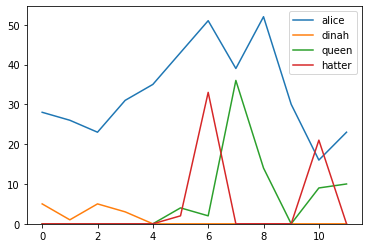

In [21]:
fig, ax = plt.subplots(1)

for term in ['alice', 'dinah', 'queen', 'hatter']:
    ax.plot(df[term], label = term)
    
ax.set(ylim = (0, None))
ax.legend()

We can see that Alice is a prominent character throughout the entirety of the book. In contrast, Dinah (Alice's pet cat) only appears in the first half of the book, and the Mad Hatter appears in just a few specific chapters. 

# Sidebar: Normalization

In many applications, it is desirable to use not the raw number of times that a word appears. Instead, various normalizations are possible, each of which provide a quantification of how important a word is within a document. For example, one could compute what proportion of a document is allocated to each word. This approach automatically accounts for the fact that some documents are longer than others. 

The most popular way to normalize is slightly more mathematically complex: it is called [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). We can compute a tf-idf term-document matrix easily, replacing the `CountVectorizer` above with the `TfidfVectorizer`. 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = "english")

In [24]:
tfidf = vec.fit_transform(df['text'])
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03312292,
        0.        ],
       [0.02665516, 0.        , 0.03103726, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0221425 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

The entries of `count_df` are no longer integers, but rather floats that estimate a weight for a word within each document. 

We won't worry much about the difference between count vectorization and tf-idf vectorization in this course, but feel free to try both when working with models to see whether you can improve your results. 